## Diabetes Dataset Prediction Model

In [1]:
import pandas as pd

df = pd.read_csv('C:\\Users\\DELL\\Downloads\\Diabetes\\diabetes.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies


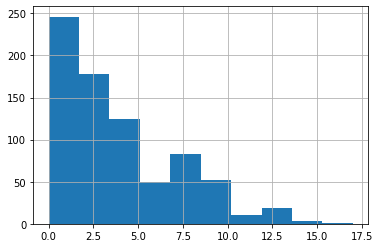

Glucose


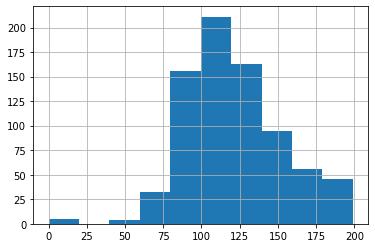

BloodPressure


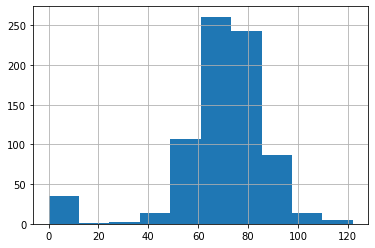

SkinThickness


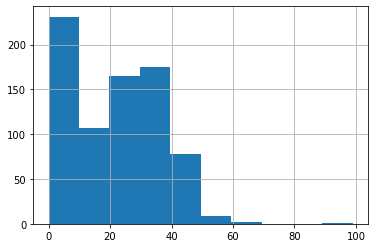

Insulin


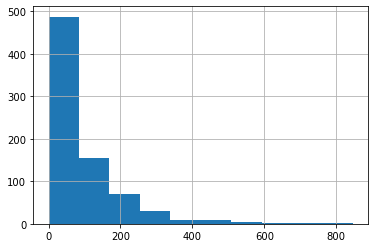

BMI


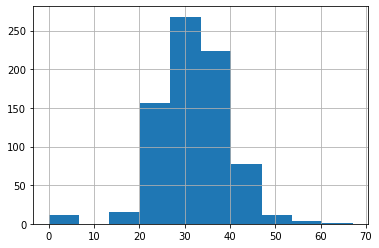

DiabetesPedigreeFunction


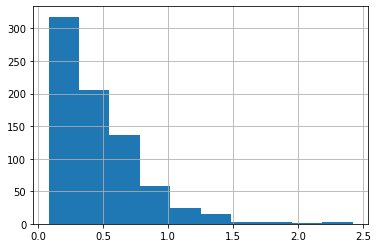

Age


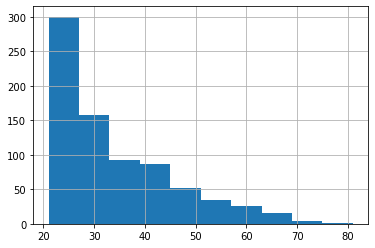

Outcome


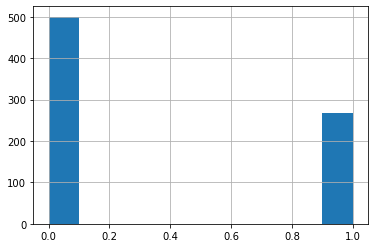

In [3]:
from matplotlib import pyplot as plt 
for col in df.columns:
    print(col)
    df[col].hist()
    plt.show()

C:\Users\DELL\anaconda3\envs\keras_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\envs\keras_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\envs\keras_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

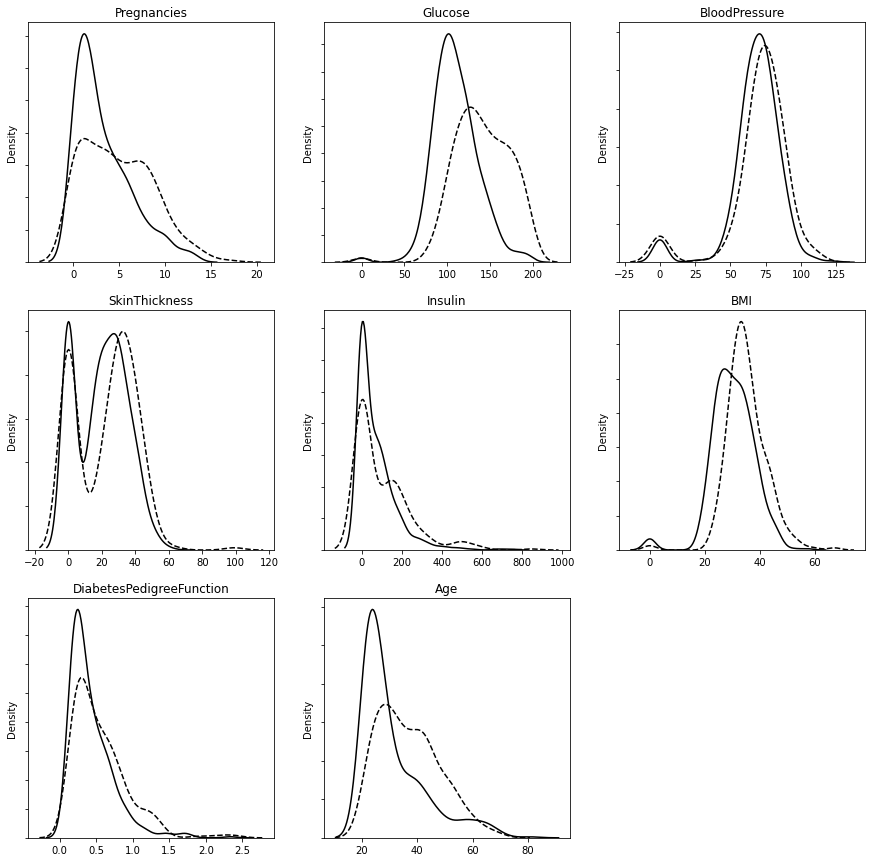

In [4]:
import seaborn as sns

# create a subplot of 3 x 3
plt.subplots(3,3,figsize=(15,15))

# Plot a density plot for each variable
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'-',  
    'color':'black', 'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False, 
    kde_kws={'linestyle':'--', 
    'color':'black', 'label':"Diabetes"})
    ax.set_title(col)

# Hide the 9th subplot (bottom right) since there are only 8 plots
plt.subplot(3,3,9).set_visible(False)

plt.show()

In [5]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [7]:
import numpy as np

df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [8]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [9]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [10]:
from sklearn import preprocessing

df_scaled = preprocessing.scale(df)

In [11]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

In [12]:
df.describe().loc[['mean', 'std','max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


In [13]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [14]:
from keras.models import Sequential 

model = Sequential()

Using TensorFlow backend.


In [15]:
from keras.layers import Dense
model.add(Dense(32,activation='relu',input_dim=8))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acuracy'])


In [17]:
# Train the model for 200 epochs
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
491/491 [==============================] - 0s 493us/step - loss: 0.6566 - accuracy: 0.6884
Epoch 2/200
491/491 [==============================] - 0s 28us/step - loss: 0.6154 - accuracy: 0.7108
Epoch 3/200
491/491 [==============================] - 0s 26us/step - loss: 0.5724 - accuracy: 0.7291
Epoch 4/200
491/491 [==============================] - 0s 28us/step - loss: 0.5327 - accuracy: 0.7475
Epoch 5/200
491/491 [==============================] - 0s 33us/step - loss: 0.4972 - accuracy: 0.7678
Epoch 6/200
491/491 [==============================] - 0s 32us/step - loss: 0.4687 - accuracy: 0.7800
Epoch 7/200
491/491 [==============================] - 0s 30us/step - loss: 0.4473 - accuracy: 0.7902
Epoch 8/200
491/491 [==============================] - 0s 31us/step - loss: 0.4310 - accuracy: 0.7882
Epoch 9/200
491/491 [==============================] - 0s 31us/step - loss: 0.4186 - accuracy: 0.7882
Epoch 10/200
491/491 [==============================] - 0s 30us/step - loss: 0.41

491/491 [==============================] - 0s 28us/step - loss: 0.2245 - accuracy: 0.9063
Epoch 160/200
491/491 [==============================] - 0s 28us/step - loss: 0.2234 - accuracy: 0.9043
Epoch 161/200
491/491 [==============================] - 0s 26us/step - loss: 0.2218 - accuracy: 0.9043
Epoch 162/200
491/491 [==============================] - 0s 28us/step - loss: 0.2226 - accuracy: 0.9104
Epoch 163/200
491/491 [==============================] - 0s 30us/step - loss: 0.2214 - accuracy: 0.9063
Epoch 164/200
491/491 [==============================] - 0s 36us/step - loss: 0.2213 - accuracy: 0.9084
Epoch 165/200
491/491 [==============================] - 0s 28us/step - loss: 0.2182 - accuracy: 0.9104
Epoch 166/200
491/491 [==============================] - 0s 28us/step - loss: 0.2177 - accuracy: 0.9043
Epoch 167/200
491/491 [==============================] - 0s 26us/step - loss: 0.2157 - accuracy: 0.9084
Epoch 168/200
491/491 [==============================] - 0s 22us/step - loss: 

In [19]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

491/491 [==============================] - 0s 43us/step
Training Accuracy: 92.46%

154/154 [==============================] - 0s 19us/step
Testing Accuracy: 77.27%



Text(33.0, 0.5, 'Actual')

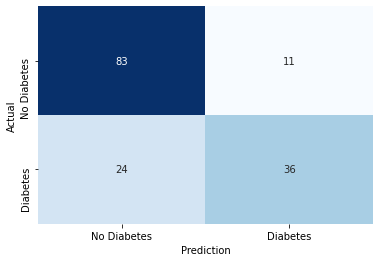

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, 
                 xticklabels=['No Diabetes','Diabetes'],
                 yticklabels=['No Diabetes','Diabetes'], 
                 cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

In [26]:
from sklearn.metrics import roc_curve
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test,y_test_pred_probs)

Text(0, 0.5, 'True Positive Rate')

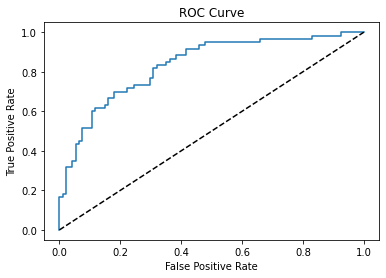

In [27]:
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'--', color = 'black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')